In [66]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style

import matplotlib
%matplotlib inline

# Dimensionality Reduction, Feature Extraction, and Manifold Learning

* Transforming data using unsupervised learning can have many motivations. 
* The most common motivations are visualization, compressing the data, and finding a representation that is more informative for further processing.
* One of the simplest and most widely used algorithms for all of these is $ principal$  $component$ $analysis $. 
* We’ll also look at two other algorithms:
     *  non-negative matrix factorization (NMF), which is commonly used for feature extraction.
     *  t-SNE, which is commonly used for visualization using two-dimensional scatter plots.

# Principal Component Analysis (PCA)

* Principal component analysis is a method that rotates the dataset in a way such that the rotated features are statistically uncorrelated.
* This rotation is often followed by selecting only a subset of the new features, according to how important they are for explaining the data.

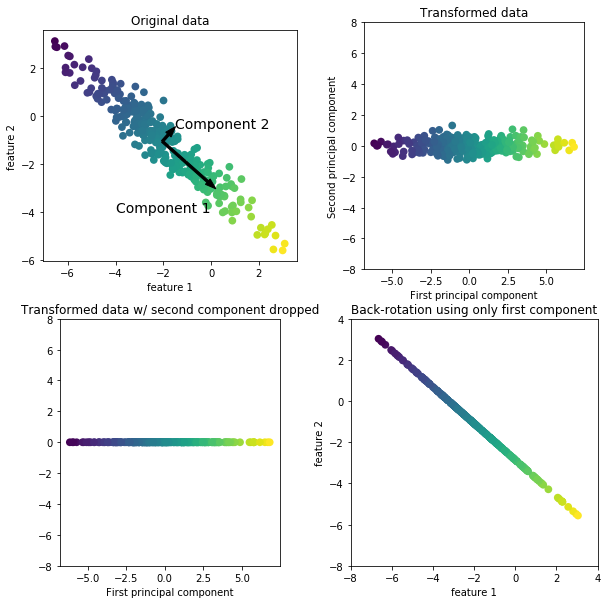

In [67]:
import mglearn
mglearn.plots.plot_pca_illustration()

* The first plot (top left) shows the original data points, colored to distinguish among them. 
* The algorithm proceeds by first finding the direction of maximum variance,labeled “Component 1.” 
* This is the direction (or vector) in the data that contains most of the information, or in other words, the direction along which the features are most correlated with each other.
* Then, the algorithm finds the direction that contains the most information while being orthogonal (at a right angle) to the first direction.



* The second plot (top right) shows the same data, but now rotated so that the first principal component aligns with the x-axis and the second principal component aligns with the y-axis. 
* Before the rotation, the mean was subtracted from the data, so that the transformed data is centered around zero. 
* In the rotated representation found by PCA, the two axes are uncorrelated, meaning that the correlation matrix of the data in this representation is zero except for the diagonal.
* 

In [68]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [69]:
cancer.target_names

array(['malignant', 'benign'], 
      dtype='<U9')

In [70]:
np.bincount(cancer.target)

array([212, 357])

In [71]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='<U23')

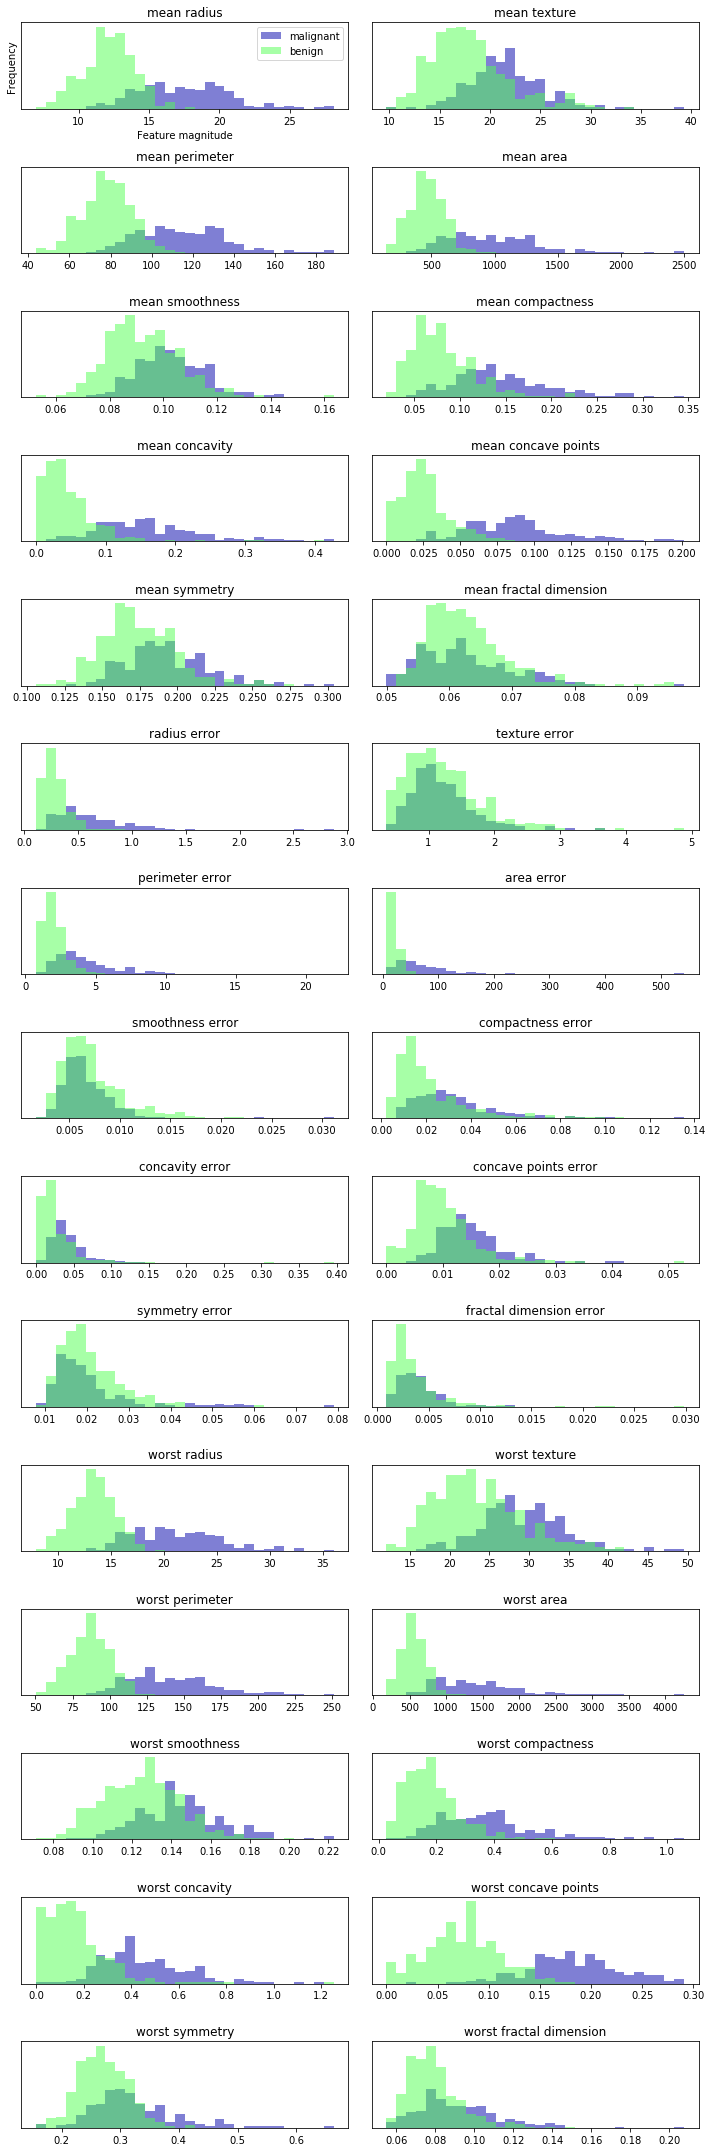

In [72]:
fig, axes = plt.subplots(15, 2, figsize=(10, 30))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    a,bins = np.histogram(cancer.data[:, i], bins=30)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    ax[0].set_xlabel("Feature magnitude")
    ax[0].set_ylabel("Frequency")
    ax[0].legend(["malignant", "benign"], loc="best")
    fig.tight_layout()

* Here we create a histogram for each of the features, counting how often a data point appears with a feature in a certain range (called a bin).
* Each plot overlays two histo‐grams, one for all of the points in the benign class and one for all the points in the malignant class. 
* This gives us some idea of how each feature is distributed across the two classes, and allows us to venture a guess as to which features are better at distinguishing malignant and benign samples.
* For example, the feature “smooth‐ness error” seems quite uninformative, because the two histograms mostly overlap.
* while the feature “worst concave points” seems quite informative, because the histo‐grams are quite disjoint.

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


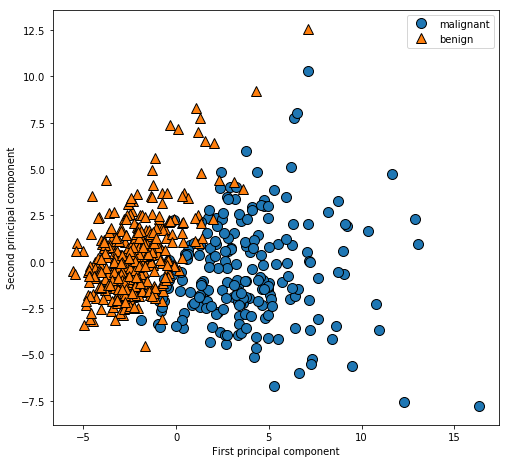

In [75]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

* For the scatter plot shown here, we plotted the first principal component against the second principal component, and then used the class information to color the points.
* we can see that the two classes separate quite well in this two-dimensional space.
* This leads us to believe that even a linear classifier (that would learn a line in this space) could do a reasonably good job at distinguishing the two classes.
* We can also see that the malignant (red) points are more spread out than the benign (blue) points.

In [76]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


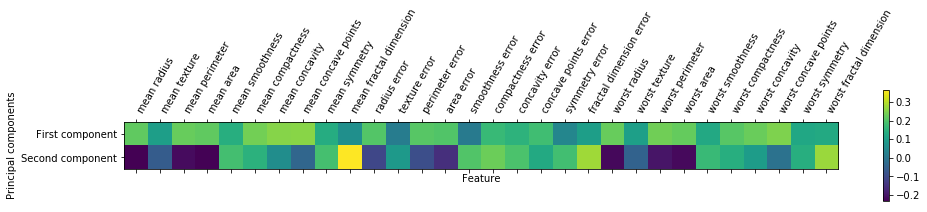

In [77]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

* we can see that in the first component, all features have the same sign (it’s negative, but as we mentioned earlier, it doesn’t matter which direction the arrow points in).
* That means that there is a general correlation between all features. 
* As one measurement is high, the others are likely to be high as well. 
* The second component has mixed signs, and both of the components involve all of the 30 features.

In [78]:
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')

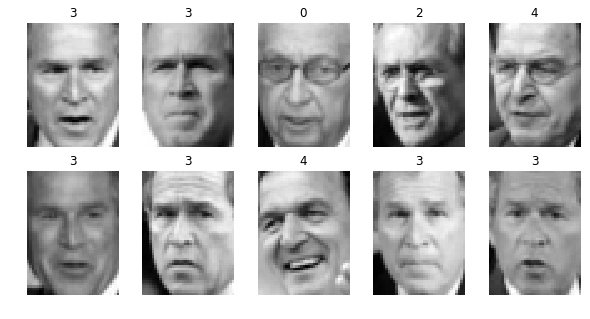

In [88]:
fig, ax = plt.subplots(2, 5, figsize=(10,5))
i= 0 
for x,y in zip(X_train[0:10],y_train[:100]):
    x1=ax.ravel()[i].imshow(x.reshape((50,37)),cmap = matplotlib.cm.binary_r)
    x1=ax.ravel()[i].set_axis_off()
    x1=ax.ravel()[i].set_title(y)
    i +=1

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify=y_train, random_state=0)

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.55


* We obtain an accuracy of 55%,

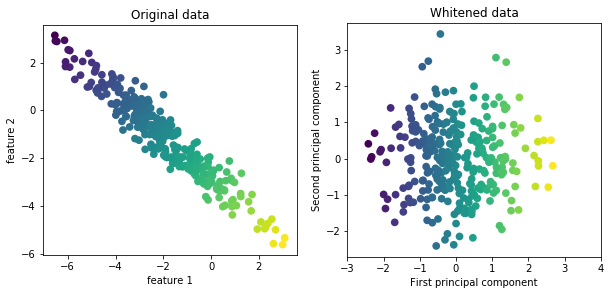

In [82]:
mglearn.plots.plot_pca_whitening()

* whitening corresponds to not only rotating the data, but also rescaling it so that the center panel is a circle instead of an ellipse.

In [83]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (724, 100)


* The new data has 100 features, the first 100 principal components. Now, we can use the new representation to classify our images using a one-nearest-neighbors classifier.

In [84]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.65


* Our accuracy improved quite significantly, from 55% to 65%, confirming our intuition that the principal components might provide a better representation of the data.

In [85]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 1850)


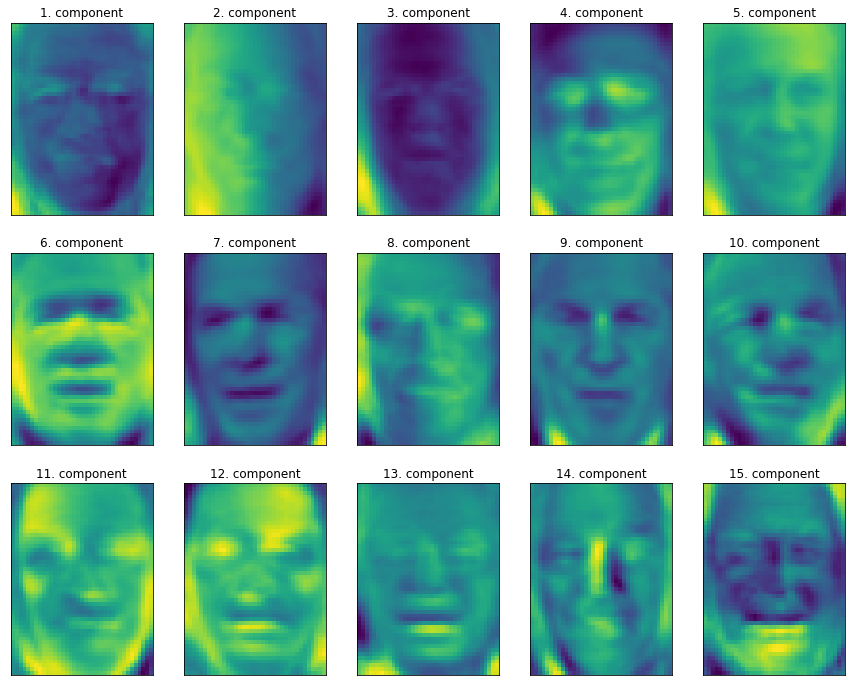

In [86]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(50,37),
    cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

* The first component seems to mostly encode the contrast between the face and the back ground.
* The second component encodes differences in lighting between the right and the left half of the face, and so on.
* While this representation is slightly more semantic than the raw pixel values, it is still quite far from how a human might perceive a face.

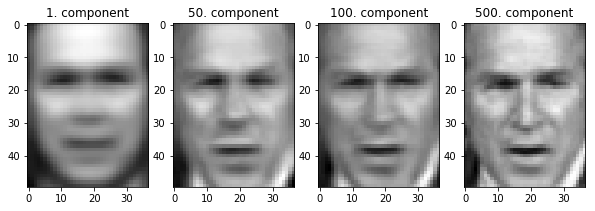

In [126]:
fig, ax = plt.subplots(1,4, figsize=(10,5))
j = 0
for i in [1,50, 100, 500]:
    nmf = NMF(n_components=i, random_state=0)
    nmf.fit(X_train)
    q = nmf.transform(X_train)
    q_i = np.dot(q, nmf.components_)
    ax.ravel()[j].imshow(q_i[0].reshape((50,37)),cmap = matplotlib.cm.binary_r)
    ax.ravel()[j].set_title("{}. component".format((i)))
    j += 1

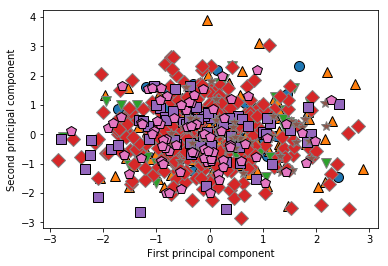

In [32]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

* We can also try to use PCA to visualize all the faces in the dataset in a scatter plot using the first two principal components.
* when we use only the first two principal components the whole data is just a big blob, with no separation of classes visible.

# Non-Negative Matrix Factorization

* Non-negative matrix factorization is another unsupervised learning algorithm that aims to extract useful features. 
* It works similarly to PCA and can also be used for dimensionality reduction.
* In NMF, we want the components and the coefficients to be non- negative; that is, we want both the components and the coefficients to be greater than or equal to zero. 
* Consequently, this method can only be applied to data where each feature is non-negative, as a non-negative sum of non-negative components cannot become negative.
* NMF can identify the original components that make up the combined data.
* NMF leads to more interpretable components than PCA, as negative components and coefficients can lead to hard-to-interpret cancellation effects

# Applying NMF to synthetic data

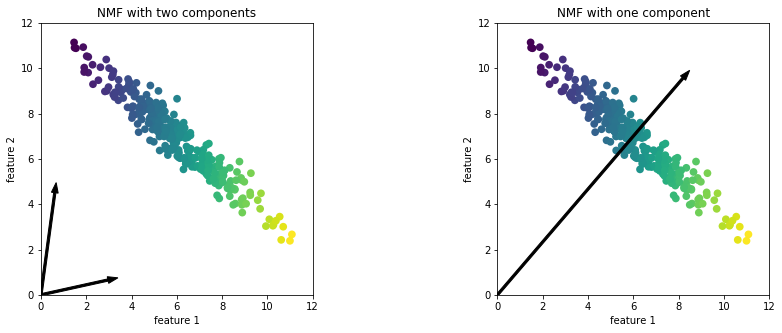

In [33]:
mglearn.plots.plot_nmf_illustration()

* For NMF with two components, as shown on the left, it is clear that all points in the data can be written as a positive combination of the two components. 
* If there are enough components to perfectly reconstruct the data , the algorithm will choose directions that point toward the extremes of the data.

* If we only use a single component, NMF creates a component that points toward the mean, as pointing there best explains the data. 
* we can see that in contrast with PCA, reducing the number of components not only removes some directions, but creates an entirely different set of components! 
* Components in NMF are also not ordered in any specific way, so there is no “first non-negative component”: all components play an equal part.
* NMF uses a random initialization, which might lead to different results depending on the random seed.

* The main parameter of NMF is how many components we want to extract. Usually this is lower than the number of input features`.

In [34]:
S = mglearn.datasets.make_signals()

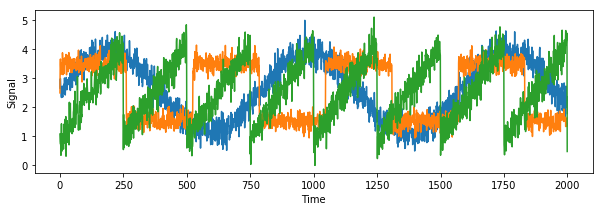

In [35]:
plt.figure(figsize=(10, 3))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

* Unfortunately we cannot observe the original signals, but only an additive mixture of all three of them. We want to recover the decomposition of the mixed signal into the original components.

In [36]:
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


In [47]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


In [48]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

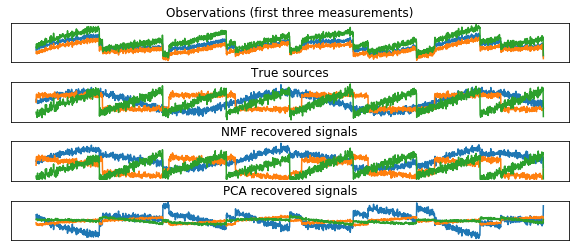

In [49]:
models = [X, S, S_, H]
names = ['Observations (first three measurements)',
'True sources',
'NMF recovered signals',
'PCA recovered signals']
fig, axes = plt.subplots(4, figsize=(10, 4), gridspec_kw={'hspace': .5},
subplot_kw={'xticks': (), 'yticks': ()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

* NMF did a reasonable job of discovering the original sources, while PCA failed and used the first component to explain the majority of the variation in the data. 
* Keep in mind that the components produced by NMF have no natural ordering. 
* In this example, the ordering of the NMF components is the same as in the original signal, but this is purely accidental.

# Manifold Learning with t-SNE

* Manifold learning algorithms that allow for much more complex map‐ pings, and often provide better visualizations.
* Manifold learning can be useful for exploratory data analysis, but is rarely used if the final goal is supervised learning. 
* The idea  behind t-SNE is to find a two-dimensional representation of the data that preserves the distances between points as best as possible. 
* t-SNE starts with a random two-dimensional representation for each data point, and then tries to make points that are close in the original feature space closer, and points that are far apart in the original feature space farther apart. 
* t-SNE puts more emphasis on points that are close by,rather than preserving distances between far-apart points. In other words, it tries to preserve the information indicating which points are neighbors to each other.

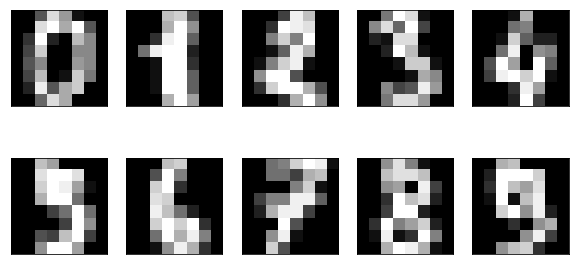

In [50]:
from sklearn.datasets import load_digits
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img,cmap = matplotlib.cm.binary_r)

In [51]:
pca = PCA(n_components=2)
pca.fit(digits.data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

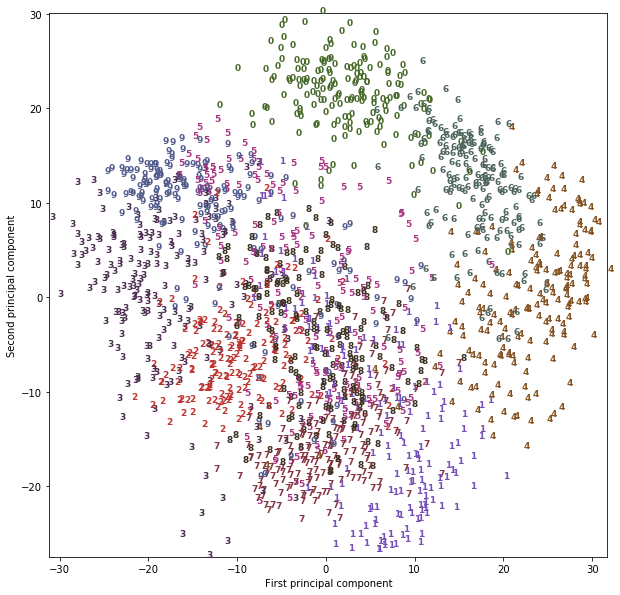

In [52]:
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
"#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
    color = colors[digits.target[i]],
    fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

* Here, we actually used the true digit classes as glyphs, to show which class is where.
* The digits zero, six, and four are relatively well separated using the first two principal components, though they still overlap. Most of the other digits overlap significantly.

In [53]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

 #### As t-SNE does not support transforming new data, the TSNE class has no transform method

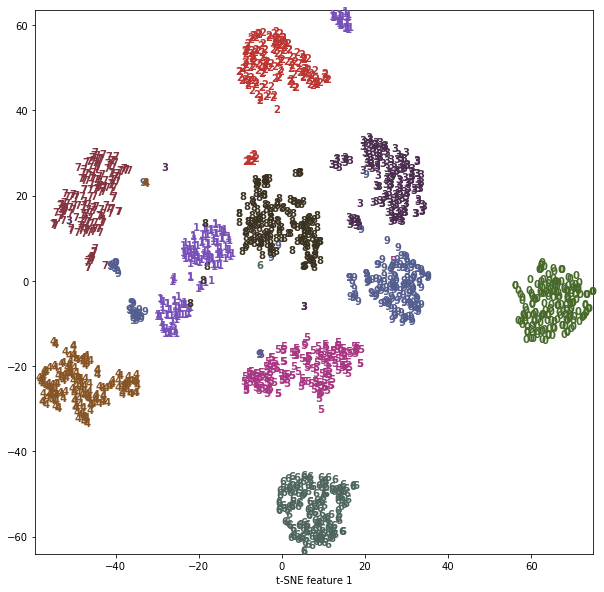

In [54]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
    color = colors[digits.target[i]],
    fontdict={'weight': 'bold', 'size': 10})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")

* The result of t-SNE is quite remarkable. All the classes are quite clearly separated.
* The ones and nines are somewhat split up, but most of the classes form a single dense group. 
* Keep in mind that this method has no knowledge of the class labels: it is completely unsupervised. Still, it can find a representation of the data in two dimensions that clearly separates the classes, based solely on how close points are in the original space.